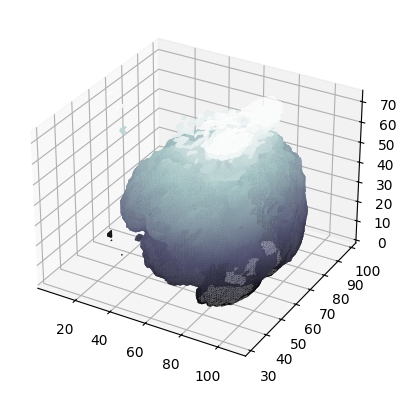

In [1]:
import numpy as np
import skimage as skimage
from skimage import io, transform
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


from skimage import measure

def load_images(directory):
    files = sorted([os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.png')])
    images = [io.imread(file, as_gray=True) for file in files]
    # Stack images into a single 3D array (assuming all images are the same size)
    volume = np.stack(images, axis=-1)
    return volume


# Example directory path


def segment_brain(volume, percentile=90):
    # Calculate the threshold based on the desired percentile of the brightness distribution
    threshold = np.percentile(volume, percentile)
    segmented = volume > threshold
    return segmented.astype(np.float32)

def plot_3d(verts, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='bone', lw=1)
    plt.show()



def extract_surface(volume, level=0.5):
    verts, faces, normals, values = measure.marching_cubes(volume, level=level)
    return verts, faces
def write_obj(filename, verts, faces):
    """Write the mesh to an OBJ file format."""
    with open(filename, 'w') as file:
        for v in verts:
            file.write(f"v {v[0]} {v[1]} {v[2]}\n")
        for face in faces:
            # OBJ Files are 1-indexed so we need to add 1 to each index
            file.write("f {} {} {}\n".format(face[0] + 1, face[1] + 1, face[2] + 1))


directory_path = input("Input  Image Directory")
threathhold = int(input("Input Threashhold"))

while (directory_path!="1"):
    volume = load_images(directory_path)
    segmented_volume = segment_brain(volume, threathhold)
    verts, faces = extract_surface(segmented_volume)
    plot_3d(verts, faces)
    write_obj("output_brain_model.obj", verts, faces)
    directory_path = input("Input  Image Directory")
    threathhold = int(input("Input Threashhold"))






In [33]:
#import numpy as np
#from PIL import Image

# Assuming `volume` is your 3D numpy array from the brain scans
#volume_normalized = (255 * (volume - volume.min()) / (volume.max() - volume.min())).astype(np.uint8)

# Select the axis for slicing; here we use 0 for slicing along the first axis
#slices = [volume_normalized[i, :, :] for i in range(volume_normalized.shape[0])]

# Save slices as images
#for i, slice in enumerate(slices):
#    img = Image.fromarray(slice)
#    img.save(f"slice_{i:03}.png")